<h1>Proyecto final - CSGO Yordano Julián </h1>

## Librerías y carga de archivos

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde los archivos CSV
df_results = pd.read_csv('results.csv')
df_picks = pd.read_csv('picks.csv')
df_players = pd.read_csv('players.csv')
df_economy = pd.read_csv('economy.csv',dtype={'team_1': object,'team_2': object,'best_of': object})



## Veo si hay NaNs en las bases de datos

In [97]:
# Veo si hay NaN en los archivos
cont_nans_results = df_results.isna().sum().sum()
print("La base de datos de resultados tiene",cont_nans_results,'valores nulos.')
cont_nans_picks = df_picks.isna().sum().sum()
print("La base de datos de picks tiene",cont_nans_picks,'valores nulos.')
cont_nans_players = df_players.isna().sum().sum()
print("La base de datos de players tiene",cont_nans_results,'valores nulos.')

La base de datos de resultados tiene 0 valores nulos.
La base de datos de picks tiene 0 valores nulos.
La base de datos de players tiene 0 valores nulos.


## Elimino las columnas que no veo útiles para el análisis

In [98]:
# Selecciono las columnas que no me sirven
columnas_innecesarias_players= ["fkdiff","kddiff","kast","hs","flash_assists","m1_kills","m1_assists","m1_deaths","m1_adr_ct","m1_adr_t","m2_adr_ct","m2_adr_t","m3_adr_ct","m3_adr_t","m1_hs","m1_flash_assists","m1_kast","m1_kddiff","m1_kast_ct","m1_kast_t","m1_kddiff_t","m1_fkdiff","m2_kills","m2_assists","m2_deaths","m2_hs","m2_flash_assists","m2_kast","m2_kddiff","m2_fkdiff","m3_kills","m3_assists","m3_deaths","m3_hs","m3_flash_assists","m3_kast","m3_kddiff","m3_fkdiff","kddiff_ct","kast_ct","kddiff_t","kast_t","m1_kddiff_ct","m2_kast_ct","m2_kddiff_t","m2_kast_t","m2_kddiff_ct","m2_kast_ct","m2_kddiff_t","m2_kast_t","m3_kddiff_ct","m3_kast_ct","m3_kddiff_t","m3_kast_t","m1_rating_ct","m1_rating_t","m2_rating_ct","m2_rating_t","m3_rating_ct","m3_rating_t"]
df_players.drop(columns=columnas_innecesarias_players, inplace=True)
df_picks.drop(columns=["system","inverted_teams"], inplace=True)

In [99]:
df_players.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m1_kills_t,m1_deaths_t,m2_kills_ct,m2_deaths_ct,m2_kills_t,m2_deaths_t,m3_kills_ct,m3_deaths_ct,m3_kills_t,m3_deaths_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,3.0,8.0,17.0,10.0,13.0,14.0,9.0,10.0,7.0,9.0
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,2.0,8.0,15.0,6.0,11.0,13.0,13.0,10.0,4.0,8.0
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,4.0,10.0,13.0,9.0,11.0,15.0,7.0,6.0,9.0,9.0
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,2.0,7.0,15.0,6.0,7.0,15.0,9.0,9.0,1.0,9.0
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,6.0,9.0,19.0,8.0,10.0,13.0,5.0,6.0,8.0,7.0


## Si bien vimos que no hay NaN, aún pueden existir valores nulos en las bases de datos

In [100]:
#Veo los valores nulos que hay en las variables
#BASE DE DATOS DE PLAYERS
for column in df_players.isnull().columns.values.tolist():
    print(column)
    print (df_players.isnull()[column].value_counts())
    print("") 
   
# Calcular la moda por jugador y guardarla en un diccionario
player_adr_mode = df_players.groupby('player_name')['adr'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

# Calcular la media de todos los valores existentes en 'adr'
adr_mean = df_players['adr'].mean()

# Llenar NaN en 'adr' con la moda correspondiente o la media global
df_players['adr'] = df_players.apply(lambda row: player_adr_mode[row['player_name']] if pd.isna(row['adr']) and row['player_name'] in player_adr_mode else adr_mean, axis=1)

# Calcular nuevamente el conteo después del reemplazo
print(df_players['adr'].isnull().value_counts())

# Llenar los NaN restantes con la media general
global_adr_mean = df_players['adr'].mean()
df_players['adr'].fillna(global_adr_mean, inplace=True)

date
date
False    383317
Name: count, dtype: int64

player_name
player_name
False    383316
True          1
Name: count, dtype: int64

team
team
False    383317
Name: count, dtype: int64

opponent
opponent
False    383317
Name: count, dtype: int64

country
country
False    383317
Name: count, dtype: int64

player_id
player_id
False    383317
Name: count, dtype: int64

match_id
match_id
False    383317
Name: count, dtype: int64

event_id
event_id
False    383317
Name: count, dtype: int64

event_name
event_name
False    383317
Name: count, dtype: int64

best_of
best_of
False    383317
Name: count, dtype: int64

map_1
map_1
False    383317
Name: count, dtype: int64

map_2
map_2
False    196523
True     186794
Name: count, dtype: int64

map_3
map_3
True     314639
False     68678
Name: count, dtype: int64

kills
kills
False    383317
Name: count, dtype: int64

assists
assists
False    383317
Name: count, dtype: int64

deaths
deaths
False    383317
Name: count, dtype: int64

adr
adr
False 

In [101]:
#BASE DE DATOS DE RESULTS
for column in df_results.isnull().columns.values.tolist():
    print(column)
    print (df_results.isnull()[column].value_counts())
    print("") 


date
date
False    45773
Name: count, dtype: int64

team_1
team_1
False    45773
Name: count, dtype: int64

team_2
team_2
False    45773
Name: count, dtype: int64

_map
_map
False    45773
Name: count, dtype: int64

result_1
result_1
False    45773
Name: count, dtype: int64

result_2
result_2
False    45773
Name: count, dtype: int64

map_winner
map_winner
False    45773
Name: count, dtype: int64

starting_ct
starting_ct
False    45773
Name: count, dtype: int64

ct_1
ct_1
False    45773
Name: count, dtype: int64

t_2
t_2
False    45773
Name: count, dtype: int64

t_1
t_1
False    45773
Name: count, dtype: int64

ct_2
ct_2
False    45773
Name: count, dtype: int64

event_id
event_id
False    45773
Name: count, dtype: int64

match_id
match_id
False    45773
Name: count, dtype: int64

rank_1
rank_1
False    45773
Name: count, dtype: int64

rank_2
rank_2
False    45773
Name: count, dtype: int64

map_wins_1
map_wins_1
False    45773
Name: count, dtype: int64

map_wins_2
map_wins_2
False    457

In [102]:
#BASE DE DATOS DE PLAYERS
for column in df_picks.isnull().columns.values.tolist():
    print(column)
    print (df_picks.isnull()[column].value_counts())
    print("") 

date
date
False    16035
Name: count, dtype: int64

team_1
team_1
False    16035
Name: count, dtype: int64

team_2
team_2
False    16035
Name: count, dtype: int64

match_id
match_id
False    16035
Name: count, dtype: int64

event_id
event_id
False    16035
Name: count, dtype: int64

best_of
best_of
False    16035
Name: count, dtype: int64

t1_removed_1
t1_removed_1
False    16035
Name: count, dtype: int64

t1_removed_2
t1_removed_2
False    16035
Name: count, dtype: int64

t1_removed_3
t1_removed_3
False    16035
Name: count, dtype: int64

t2_removed_1
t2_removed_1
False    16035
Name: count, dtype: int64

t2_removed_2
t2_removed_2
False    16035
Name: count, dtype: int64

t2_removed_3
t2_removed_3
False    16035
Name: count, dtype: int64

t1_picked_1
t1_picked_1
False    16035
Name: count, dtype: int64

t2_picked_1
t2_picked_1
False    16035
Name: count, dtype: int64

left_over
left_over
False    16035
Name: count, dtype: int64



## Análisis de tipos de datos

In [103]:
#RESULTS
df_results.dtypes

date            object
team_1          object
team_2          object
_map            object
result_1         int64
result_2         int64
map_winner       int64
starting_ct      int64
ct_1             int64
t_2              int64
t_1              int64
ct_2             int64
event_id         int64
match_id         int64
rank_1           int64
rank_2           int64
map_wins_1       int64
map_wins_2       int64
match_winner     int64
dtype: object

In [104]:
#PLAYERS
df_players.dtypes

date             object
player_name      object
team             object
opponent         object
country          object
player_id         int64
match_id          int64
event_id          int64
event_name       object
best_of           int64
map_1            object
map_2            object
map_3            object
kills             int64
assists           int64
deaths            int64
adr             float64
rating          float64
m1_adr          float64
m1_rating       float64
m2_adr          float64
m2_rating       float64
m3_adr          float64
m3_rating       float64
kills_ct        float64
deaths_ct       float64
adr_ct          float64
rating_ct       float64
kills_t         float64
deaths_t        float64
adr_t           float64
rating_t        float64
m1_kills_ct     float64
m1_deaths_ct    float64
m1_kills_t      float64
m1_deaths_t     float64
m2_kills_ct     float64
m2_deaths_ct    float64
m2_kills_t      float64
m2_deaths_t     float64
m3_kills_ct     float64
m3_deaths_ct    

In [105]:
#PICKS
df_picks.dtypes

date            object
team_1          object
team_2          object
match_id         int64
event_id         int64
best_of         object
t1_removed_1    object
t1_removed_2    object
t1_removed_3    object
t2_removed_1    object
t2_removed_2    object
t2_removed_3    object
t1_picked_1     object
t2_picked_1     object
left_over       object
dtype: object

In [106]:
df_economy.dtypes

date          object
match_id       int64
event_id       int64
team_1        object
team_2        object
              ...   
26_winner    float64
27_winner    float64
28_winner    float64
29_winner    float64
30_winner    float64
Length: 99, dtype: object

In [107]:
#Aseguro los lados de los equipos, para que sean string
df_economy['t1_start']=df_economy['t1_start'].astype('str')
df_economy['t2_start']=df_economy['t2_start'].astype('str')

In [108]:
df_results.replace("?", np.nan, inplace = True)
df_results = df_results.dropna()

## Reemplazo al ganador por su nombre, en vez de usar el número 1 o 2

In [109]:
#Si gana el equipo 1, devuelvo su nombre (lo mismo para el 2)
def reemplazar_ganador(row):
    if row["match_winner"] == 1:
        return row["team_1"]
    elif row["match_winner"] == 2:
        return row["team_2"]
    else:
        return row["match_winner"]

# Reemplazo los números del ganador por el nombre del equipo
df_results["match_winner"] = df_results.apply(reemplazar_ganador, axis=1)

# Imprimo el df actualizado
print(df_results)

             date               team_1          team_2         _map  result_1  \
0      2020-03-18              Recon 5         TeamOne        Dust2         0   
1      2020-03-18              Recon 5         TeamOne      Inferno        13   
2      2020-03-18  New England Whalers        Station7      Inferno        12   
3      2020-03-18              Rugratz  Bad News Bears      Inferno         7   
4      2020-03-18              Rugratz  Bad News Bears      Vertigo         8   
...           ...                  ...             ...          ...       ...   
45768  2015-11-05                   G2      E-frag.net      Inferno        13   
45769  2015-11-05                   G2      E-frag.net        Dust2        16   
45770  2015-11-04                  CLG          Liquid      Inferno        16   
45771  2015-11-03                  NiP        Dignitas        Train        16   
45772  2015-11-03                  NiP            Envy  Cobblestone        16   

       result_2  map_winner

In [110]:
print(df_players)

              date player_name           team       opponent        country  \
0       2020-02-26      Brehze  Evil Geniuses         Liquid  United States   
1       2020-02-26        CeRq  Evil Geniuses         Liquid       Bulgaria   
2       2020-02-26       EliGE         Liquid  Evil Geniuses  United States   
3       2020-02-26       Ethan  Evil Geniuses         Liquid  United States   
4       2020-02-26         NAF         Liquid  Evil Geniuses         Canada   
...            ...         ...            ...            ...            ...   
383312  2015-10-07      kIMERA        ExAequo      RIP Fonty          Italy   
383313  2015-10-07   morphiw0w        ExAequo      RIP Fonty          Italy   
383314  2015-10-07     overfly      RIP Fonty        ExAequo          Italy   
383315  2015-10-07     simozor      RIP Fonty        ExAequo          Italy   
383316  2015-10-07       xullE      RIP Fonty        ExAequo          Italy   

        player_id  match_id  event_id              

## Genero un df para ver a cada equipo con sus jugadores por match y el adr de cada uno

In [111]:
df_agrupamiento_adr = df_players[['match_id','player_name','adr','team']]

df_agrupamiento_adr = df_agrupamiento_adr.groupby(['match_id','team'],as_index=False)['adr'].mean() #Promedio del adr por equipo
df_agrupamiento_adr['adr'].fillna(df_players['adr'].mean(), inplace=True) #Relleno los NaN con la media
print(df_agrupamiento_adr)


       match_id           team        adr
0       2297880            CLG  70.500000
1       2297880         Splyce  58.000000
2       2298447       FlipSid3  71.780000
3       2298447         Reason  65.560000
4       2298484             SK  71.880000
...         ...            ...        ...
76742   2339816  Thunder Logic  74.816885
76743   2339817         Divine  74.816885
76744   2339817        Oceanus  74.816885
76745   2339828       Airborne  74.816885
76746   2339828         Chiefs  74.816885

[76747 rows x 3 columns]


## Veo cual es el mapa donde mayormente ganan los equipos mejor rankeados

In [112]:
# Suponiendo que df_results es tu DataFrame
equipos_con_mas_victorias = df_results['match_winner'].value_counts().reset_index()
equipos_con_mas_victorias.columns = ['equipo', 'victorias']

# Ordenar de mayor a menor cantidad de victorias
equipos_con_mas_victorias = equipos_con_mas_victorias.sort_values(by='victorias', ascending=False)

# Imprimir el resultado
print(equipos_con_mas_victorias)

                  equipo  victorias
0                 Liquid        620
1               Astralis        597
2                Tricked        562
3            mousesports        562
4                  TYLOO        540
...                  ...        ...
1034  Imperio Multimedia          1
1033  ex-Riotous Academy          1
1032         Dark Origin          1
1031                  UP          1
1106         Nexus Storm          1

[1107 rows x 2 columns]


In [113]:
#Obtengo los equipos con más victorias
equipos_con_mas_victorias = df_results['match_winner'].value_counts().head(5).index

#creo un DataFrame para almacenar los resultados
df_equipos_con_mas_victorias = pd.DataFrame(index=equipos_con_mas_victorias)

#Itero sobre los mapas y cuento las victorias para cada equipo
for mapa in df_results['_map'].unique():
    victorias_por_equipo = df_results[df_results['_map'] == mapa]['match_winner'].value_counts()
    df_equipos_con_mas_victorias[mapa] = df_equipos_con_mas_victorias.index.map(victorias_por_equipo)

#Limpio las columnas que no me sirven
df_equipos_con_mas_victorias = df_equipos_con_mas_victorias.drop(columns=['Default'])

#Veo el resultado
print(df_equipos_con_mas_victorias)

              Dust2  Inferno  Vertigo  Overpass  Nuke  Mirage  Train  Cache  \
match_winner                                                                  
Liquid           69      108       16        80    43     122     51     62   
Astralis         67      128       11       100    81      93     84     30   
Tricked          49       67        6        81    89     100    111     14   
mousesports      67       78       11        29    58     128     92     46   
TYLOO            59       85        4        59     1     144     64     76   

              Cobblestone  
match_winner               
Liquid                 69  
Astralis                3  
Tricked                45  
mousesports            52  
TYLOO                  47  


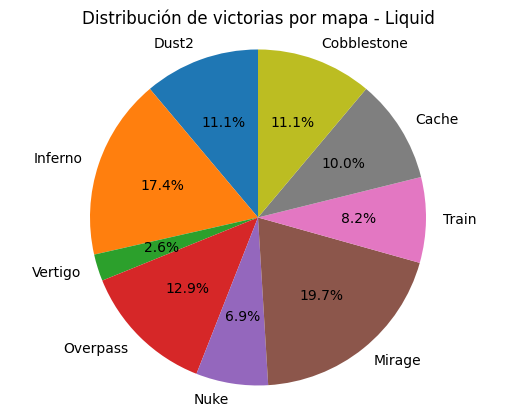

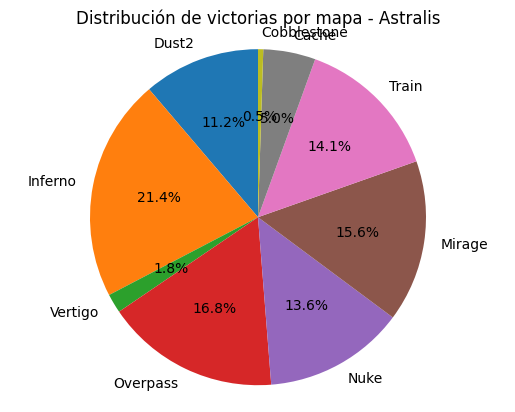

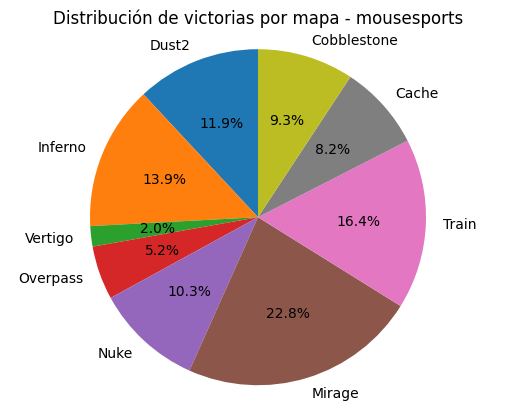

In [114]:
df_equipos_seleccionados = df_equipos_con_mas_victorias.loc[['Liquid', 'Astralis', 'mousesports']]

# Creo gráficas de torta para cada equipo
for equipo in df_equipos_seleccionados.index:
    victorias_por_mapa = df_equipos_seleccionados.loc[equipo]
    
    #Creo la gráfica de torta
    plt.figure()
    plt.pie(victorias_por_mapa, labels=victorias_por_mapa.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de victorias por mapa - {equipo}')
    plt.axis('equal')  # Equal aspect ratio asegura que la gráfica sea un círculo.

#Muestro las gráficas
plt.show()

### Se observan los mapas en los que los equipos Top Tier poseen el mayor porcentaje de victorias.
### En el caso del equipo Liquid, el mapa en el que mejor rinden es en Mirage (con un 19.7% de winrate), seguido del mapa Inferno (17.4%) y Overpass (12.9%).
### En el caso de Astralis, su mejor mapa es Inferno con una tasa de victorias del 21.4%, seguido de Overpass (16.8%) y luego Mirage (15.6%).
### Por último, mousesports debe su mayor winrate al mapa Mirage (22.8% de sus victorias), a Train (16.4%) y a Inferno (13.9%).
### Puede decirse entonces, que un factor clave para dominar el circuito de CSGO es poder sacar ventaja en estos mapas anteriormente mencionados, más justamente Mirage e Inferno, que son mapas fundamentales para escalar en la lista del ranking mundial

## Puede apreciarse también alguna gráfica en conjunto de este top de equipos, para ver porcentajes generales

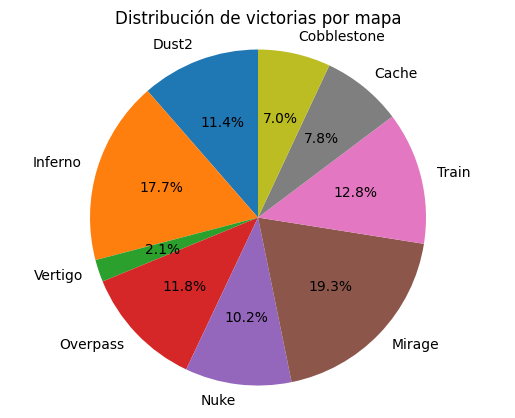

In [115]:
#Sumo las victorias por mapa de los tres equipos
total_victorias_por_mapa = df_equipos_seleccionados.sum()

#Creo la gráfica de torta
plt.pie(total_victorias_por_mapa, labels=total_victorias_por_mapa.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de victorias por mapa')
plt.axis('equal')  # Equal aspect ratio asegura que la gráfica sea un círculo.

#Ploteo
plt.show()

### Se ve claramente como entre Mirage e Inferno, se abarca la mayoría del porcentaje de victorias de los 3 mejores equipos, con un winrate en conjunto de ambos mapas de casi el 40%!

## Saco ADR promedio de todos los equipos

In [116]:
#Calculo el promedio de ADR por equipo
df_adr_promedio = df_agrupamiento_adr.groupby('team')['adr'].mean().reset_index()

#Ordeno el DataFrame por el promedio de ADR de forma descendente
df_adr_promedio = df_adr_promedio.sort_values(by='adr', ascending=False)

#Tomo los primeros 10 equipos
top10_equipos = df_adr_promedio.head(10)
#Imprimo el resultado
print(top10_equipos)



              team        adr
742   Day Dreamers  79.537550
916   EZmarket.org  78.585850
205        Airless  77.783400
316       Atlantis  77.337550
3743       ex-USSR  77.069481
788     Dictionary  75.881060
2970      TEAM.TDA  75.743400
3680        etoile  75.620475
687       CyberZen  75.469506
1523     Incursion  75.413609


In [117]:
# Supongamos que estas son las columnas relevantes en df_results y df_teams
columnas_resultados = ['team_1', 'rank_1', 'team_2', 'rank_2']
columnas_equipos = ['team', 'current_rank']

# Seleccionar solo las columnas de interés
df_resultados = df_results[columnas_resultados]
# Crear un DataFrame combinado con la información de ranking para ambos equipos
df_ranks = pd.DataFrame(columns=['team', 'rank'])

# Agregar el ranking del equipo 1
df_ranks['team'] = df_resultados['team_1']
df_ranks['rank'] = df_resultados['rank_1']

# Agregar el ranking del equipo 2
df_ranks = pd.concat([df_ranks, pd.DataFrame({'team': df_resultados['team_2'], 'rank': df_resultados['rank_2']})])

# Eliminar duplicados y ordenar por equipo
df_ranks = df_ranks.drop_duplicates(subset=['team'], keep='last').sort_values(by='rank').reset_index(drop=True)


# Imprimir el DataFrame resultante
print(df_ranks)

                 team  rank
0                Envy     1
1          Virtus.pro     2
2                 TSM     3
3            Astralis     4
4              fnatic     4
...               ...   ...
1548          Wings.V   380
1549  Virtual Genesis   383
1550            iYATi   388
1551             Rekt   390
1552          Saltbae   404

[1553 rows x 2 columns]


## No me sirve, ya que los ranking varían según la fecha y el evento

## Procederé a analizar el desempeño general del equipo más ganador (Liquid)

### Creo un nuevo df que contenga información clave de los jugadores de Liquid

In [118]:

# Ajusto el nombre del equipo según tus datos
team_liquid = 'Liquid'

# Filtro las filas de df_players donde el equipo sea igual a 'Liquid'
df_liquid = df_players[df_players['team'] == team_liquid].copy()

# Selecciono las columnas necesarias
df_liquid = df_liquid[['date', 'match_id', 'player_name', 'kills', 'assists', 'deaths', 'adr']]

# Calculo la moda por jugador y guardarla en un diccionario
player_adr_mode = df_liquid.groupby('player_name')['adr'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

# Lleno NaN en 'adr' con la moda correspondiente
df_liquid['adr'] = df_liquid.apply(lambda row: player_adr_mode[row['player_name']] if pd.isna(row['adr']) else row['adr'], axis=1)


# Lleno los NaN restantes con la media general
global_adr_mean = df_players['adr'].mean()
df_liquid['adr'].fillna(global_adr_mean, inplace=True)

#Agrego el dato de si se ganó la partida o no, a partir de crear una columna que tenga True o False
# Obtengo un diccionario que mapea match_id a match_winner en df_results
match_winner_dict = df_results.set_index('match_id')['match_winner'].to_dict()

# Agrego la columna 'ganado' a df_liquid
df_liquid['ganado'] = df_liquid['match_id'].map(match_winner_dict) == 'Liquid'


nan_counts = df_liquid.isna().sum()
print(nan_counts)
print(df_liquid)


date           0
match_id       0
player_name    0
kills          0
assists        0
deaths         0
adr            0
ganado         0
dtype: int64
              date  match_id player_name  kills  assists  deaths        adr  \
2       2020-02-26   2339385       EliGE     55       10      51  74.816885   
4       2020-02-26   2339385         NAF     52       22      46  74.816885   
5       2020-02-26   2339385    Stewie2K     56        8      54  74.816885   
6       2020-02-26   2339385     Twistzz     72       14      45  74.816885   
7       2020-02-26   2339385       nitr0     50       15      52  74.816885   
...            ...       ...         ...    ...      ...     ...        ...   
383258  2015-10-08   2298494       EliGE     19        4       9  84.200000   
383259  2015-10-08   2298494       FugLy     18        4       8  68.300000   
383260  2015-10-08   2298494        Hiko     21        1       8  64.200000   
383263  2015-10-08   2298494       adreN     13        4     

# Analizo que tan importantes son las kills, asistencias y muertes para lograr triunfar en una partida

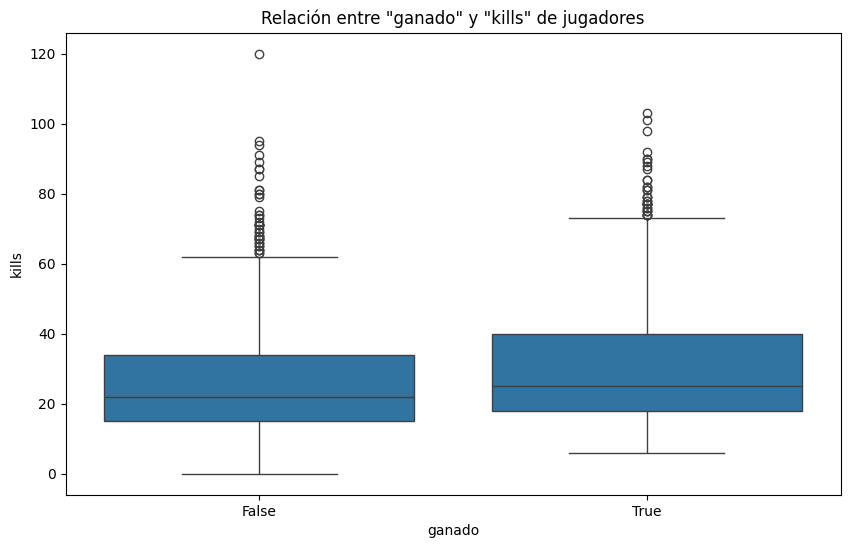

In [119]:

# Crear un boxplot para visualizar la distribución de kills según si ganaron o no
plt.figure(figsize=(10, 6))
sns.boxplot(x='ganado', y='kills', data=df_liquid)
plt.title('Relación entre "ganado" y "kills" de jugadores')
plt.show()

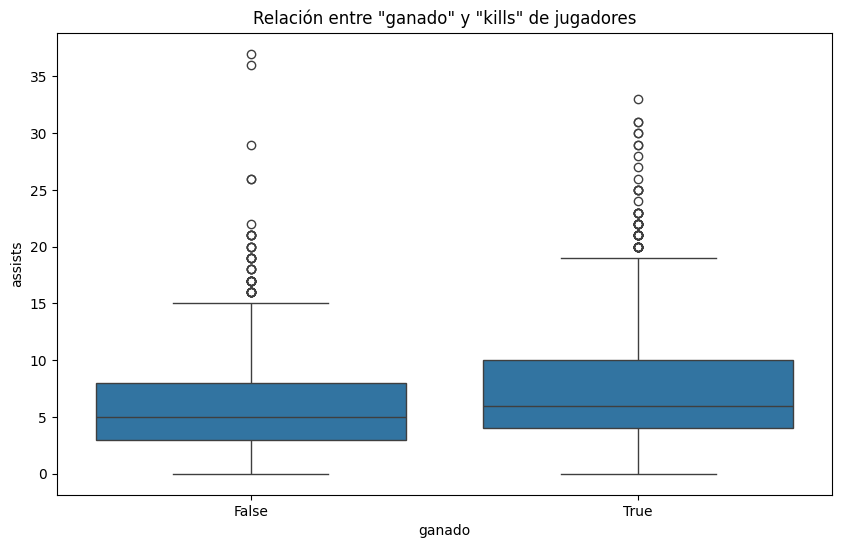

In [120]:
# Crear un boxplot para visualizar la distribución de kills según si ganaron o no
plt.figure(figsize=(10, 6))
sns.boxplot(x='ganado', y='assists', data=df_liquid)
plt.title('Relación entre "ganado" y "kills" de jugadores')
plt.show()

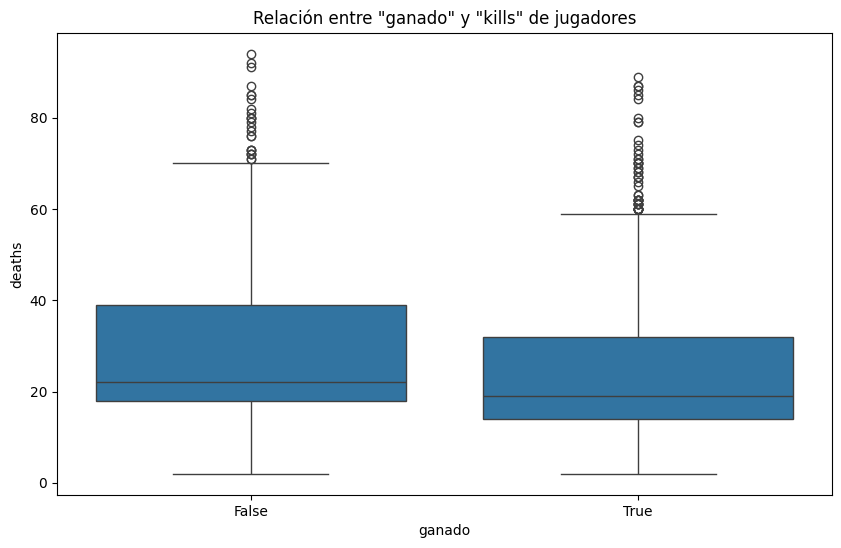

In [121]:
# Crear un boxplot para visualizar la distribución de kills según si ganaron o no
plt.figure(figsize=(10, 6))
sns.boxplot(x='ganado', y='deaths', data=df_liquid)
plt.title('Relación entre "ganado" y "kills" de jugadores')
plt.show()

## Si bien hay muchos outliers, se ve que los boxplots muestran que el hecho de generar daño afecta para bien en una posible victoria para un match, mientras que cuanto menos se sobreviva en las rondas, más probable es que se pierda la partida. Esto puede sonar muy obvio, pero es importante aclararlo, ya que las partidas no se ganan necesariamente matando a todo el equipo, sino que si detona la bomba también se obtiene una ronda ganada

In [122]:
# Calculo el número de partidas ganadas y perdidas para cada jugador
win_loss_counts = df_liquid['ganado'].value_counts()

# Calculo el porcentaje de partidas ganadas y perdidas
win_percentage = (win_loss_counts[True] / len(df_liquid)) * 100
loss_percentage = (win_loss_counts[False] / len(df_liquid)) * 100

print(f'Porcentaje de partidas ganadas: {win_percentage:.2f}%')
print(f'Porcentaje de partidas perdidas: {loss_percentage:.2f}%')

Porcentaje de partidas ganadas: 58.05%
Porcentaje de partidas perdidas: 41.95%


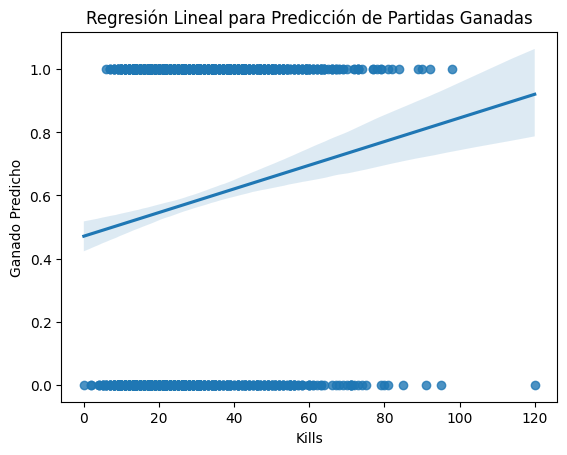

In [123]:
X = df_liquid[['kills']]

y = df_liquid['ganado']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

# Inicializar el modelo de regresión logística
lm = LinearRegression()

# Entrenar el modelo
lm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lm.predict(X_test)

sns.regplot(x=X_train, y=y_train,data=df_liquid)
plt.xlabel('Kills')
plt.ylabel('Ganado Predicho')
plt.title('Regresión Lineal para Predicción de Partidas Ganadas')
plt.show()

## Siquiera sirve compararar el modelo entrenado y el de testeo, ya que las kills no muestran ser un buen predictor para las victorias del equipo en un futuro

In [126]:

# Relacionar con df_liquid solo para Liquid
df_liquid_economy = pd.merge(df_liquid, df_economy, how='inner', on=['date', 'match_id'])
df_liquid_economy = df_liquid_economy[(df_liquid_economy['team_1'] == 'Liquid') | (df_liquid_economy['team_2'] == 'Liquid')]
# Agregar una columna 'lado_start' con valores iniciales en NaN
df_liquid['lado_start'] = np.nan

# Iterar sobre las filas del DataFrame
for index, row in df_liquid.iterrows():
    match_id = row['match_id']
    
    # Verificar si 'Liquid' está en team_1
    team_1_row = df_liquid_economy[df_liquid_economy['match_id'] == match_id]
    if not team_1_row.empty and 'Liquid' in team_1_row['team_1'].values:
        df_liquid.at[index, 'lado_start'] = str(team_1_row['t1_start'].values[0])
        # Convertir la columna 'lado_start' a tipo str
        df_liquid['lado_start'] = df_liquid['lado_start'].astype('str')
        # Asignar el valor a todas las filas de 'df_liquid' correspondientes a esta partida
        df_liquid.loc[df_liquid['match_id'] == match_id, 'lado_start'] = str(team_1_row['t1_start'].values[0])
    else:
        # Verificar si 'Liquid' está en team_2
        team_2_row = df_liquid_economy[df_liquid_economy['match_id'] == match_id]
        if not team_2_row.empty and 'Liquid' in team_2_row['team_2'].values:
            df_liquid.at[index, 'lado_start'] = str(team_2_row['t2_start'].values[0])
            # Convertir la columna 'lado_start' a tipo float64
            df_liquid['lado_start'] = df_liquid['lado_start'].astype('str')
            # Asignar el valor a todas las filas de 'df_liquid' correspondientes a esta partida
            df_liquid.loc[df_liquid['match_id'] == match_id, 'lado_start'] = str(team_2_row['t2_start'].values[0])
    
print(df_liquid)
print(df_liquid['lado_start'].value_counts())

C:\Users\julian\AppData\Local\Temp\ipykernel_14564\812257161.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 't' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_liquid.at[index, 'lado_start'] = str(team_1_row['t1_start'].values[0])


              date  match_id player_name  kills  assists  deaths        adr  \
2       2020-02-26   2339385       EliGE     55       10      51  74.816885   
4       2020-02-26   2339385         NAF     52       22      46  74.816885   
5       2020-02-26   2339385    Stewie2K     56        8      54  74.816885   
6       2020-02-26   2339385     Twistzz     72       14      45  74.816885   
7       2020-02-26   2339385       nitr0     50       15      52  74.816885   
...            ...       ...         ...    ...      ...     ...        ...   
383258  2015-10-08   2298494       EliGE     19        4       9  84.200000   
383259  2015-10-08   2298494       FugLy     18        4       8  68.300000   
383260  2015-10-08   2298494        Hiko     21        1       8  64.200000   
383263  2015-10-08   2298494       adreN     13        4       9  83.900000   
383265  2015-10-08   2298494       nitr0     19        4       9  63.500000   

        ganado lado_start  
2         True         

## Tuve errores con ciertas partidas, donde no me completó correctamente si arrancaron del lado ct o t. Procederé a trabajar con los datos que si fueron completados. Veremos qué lado es más favorable en un comienzo para el equipo

In [128]:
# Calcular porcentajes de partidas ganadas para cada lado
porcentaje_ganado_ct = (df_liquid['lado_start'] == 'ct').eq(df_liquid['ganado']).mean() * 100
porcentaje_ganado_t = (df_liquid['lado_start'] == 't').eq(df_liquid['ganado']).mean() * 100

# Imprimir resultados
print(f"Porcentaje de partidas ganadas como CT: {porcentaje_ganado_ct:.2f}%")
print(f"Porcentaje de partidas ganadas como T: {porcentaje_ganado_t:.2f}%")

Porcentaje de partidas ganadas como CT: 51.59%
Porcentaje de partidas ganadas como T: 50.79%


In [130]:
# Filtrar partidas donde arrancaron del lado 't'
df_t_start = df_liquid[df_liquid['lado_start'] == 't']

# Calcular el promedio de partidas ganadas y perdidas cuando arrancaron del lado 't'
promedio_ganadas_t = df_t_start[df_t_start['ganado'] == True].shape[0] / df_t_start.shape[0] * 100
promedio_perdidas_t = df_t_start[df_t_start['ganado'] == False].shape[0] / df_t_start.shape[0] * 100

# Imprimir resultados
print(f"Promedio de partidas ganadas cuando arrancaron del lado 't': {promedio_ganadas_t:.2f}%")
print(f"Promedio de partidas perdidas cuando arrancaron del lado 't': {promedio_perdidas_t:.2f}%")

# Filtrar partidas donde arrancaron del lado 'ct'
df_ct_start = df_liquid[df_liquid['lado_start'] == 'ct']

# Calcular el promedio de partidas ganadas y perdidas cuando arrancaron del lado 'ct'
promedio_ganadas_ct = df_ct_start[df_ct_start['ganado'] == True].shape[0] / df_ct_start.shape[0] * 100
promedio_perdidas_ct = df_ct_start[df_ct_start['ganado'] == False].shape[0] / df_ct_start.shape[0] * 100

# Imprimir resultados
print(f"Promedio de partidas ganadas cuando arrancaron del lado 'ct': {promedio_ganadas_ct:.2f}%")
print(f"Promedio de partidas perdidas cuando arrancaron del lado 'ct': {promedio_perdidas_ct:.2f}%")

Promedio de partidas ganadas cuando arrancaron del lado 't': 65.39%
Promedio de partidas perdidas cuando arrancaron del lado 't': 34.61%
Promedio de partidas ganadas cuando arrancaron del lado 'ct': 64.71%
Promedio de partidas perdidas cuando arrancaron del lado 'ct': 35.29%


## Se descarta la idea de que el lado en el cual comienza el equipo afecta el resultado final de la partida. Esto se tuvo en cuenta ya que, quizás, los equipos tienen preferencias de ciertos lados según el mapa, y un mal rendimiento al principio puede afectar la forma en que terminan la partida una vez que cambiaron de lado

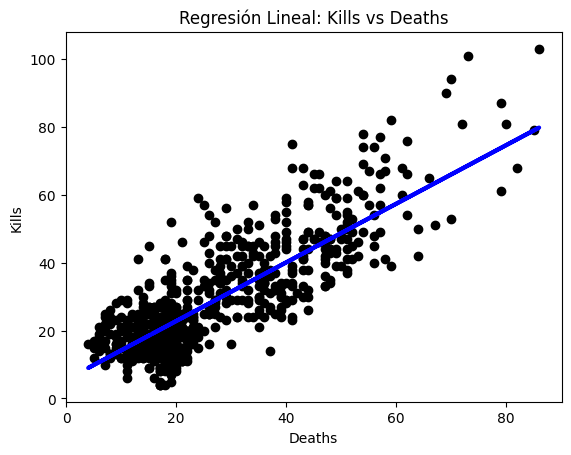

In [133]:
#Inicializo el modelo de regresión lineal
lm = LinearRegression()

#Entreno el modelo
lm.fit(X_train, y_train)

#Realizo predicciones en el conjunto de prueba
y_pred = lm.predict(X_test)

#Visualizo los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Deaths')
plt.ylabel('Kills')
plt.title('Regresión Lineal: Kills vs Deaths')
plt.show()
lm.score()

### El análisis realizado a mi parecer no fue como esperaba, debido a complicaciones que me surgieron con la complejidad de manejar los datos y manipular las bases de datos para acomodar la información que buscaba analizar. De todas formas, este proyecto sirvió para entender de mejor manera cómo funciona un proceso de análisis de una base de datos.

In [ ]:
#Guardo los archivos .csv
df_players.to_csv('df_players.csv')
df_results.to_csv('df_results.csv')
df_picks.to_csv('df_picks.csv')
df_liquid.to_csv('df_liquid.csv')
df_liquid_economy.to_csv('df_pruebaeconomia.csv')
